In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("BigMart_sales - BigMart_sales.csv")

What are the basic characteristics of the dataset?
\
The basic characteristics of a dataset refer to the foundational information that helps you understand the structure, content, and nature of the dataset before any deep analysis. These characteristics provide an initial overview of what the data looks like and how it can be analyzed.



In [24]:
#Identify the number of rows and columns, data types, and provide a summary using descriptive statistics.
df.shape

(8523, 12)

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [9]:
#Are there any missing values in the dataset? Identify columns with missing data, quantify the extent of missingness, and suggest appropriate handling strategies.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.isnull().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

suggest appropriate handling strategies

Impute using mean/median or drop if many missing

In [16]:
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [18]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [19]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

What is the distribution of numerical features? Use histograms, boxplots, or density plots to explore the distribution and detect outliers or skewness.?

The distribution of numerical features refers to how the values of each numeric column (e.g., age, salary, weight) are spread across their range in the dataset.

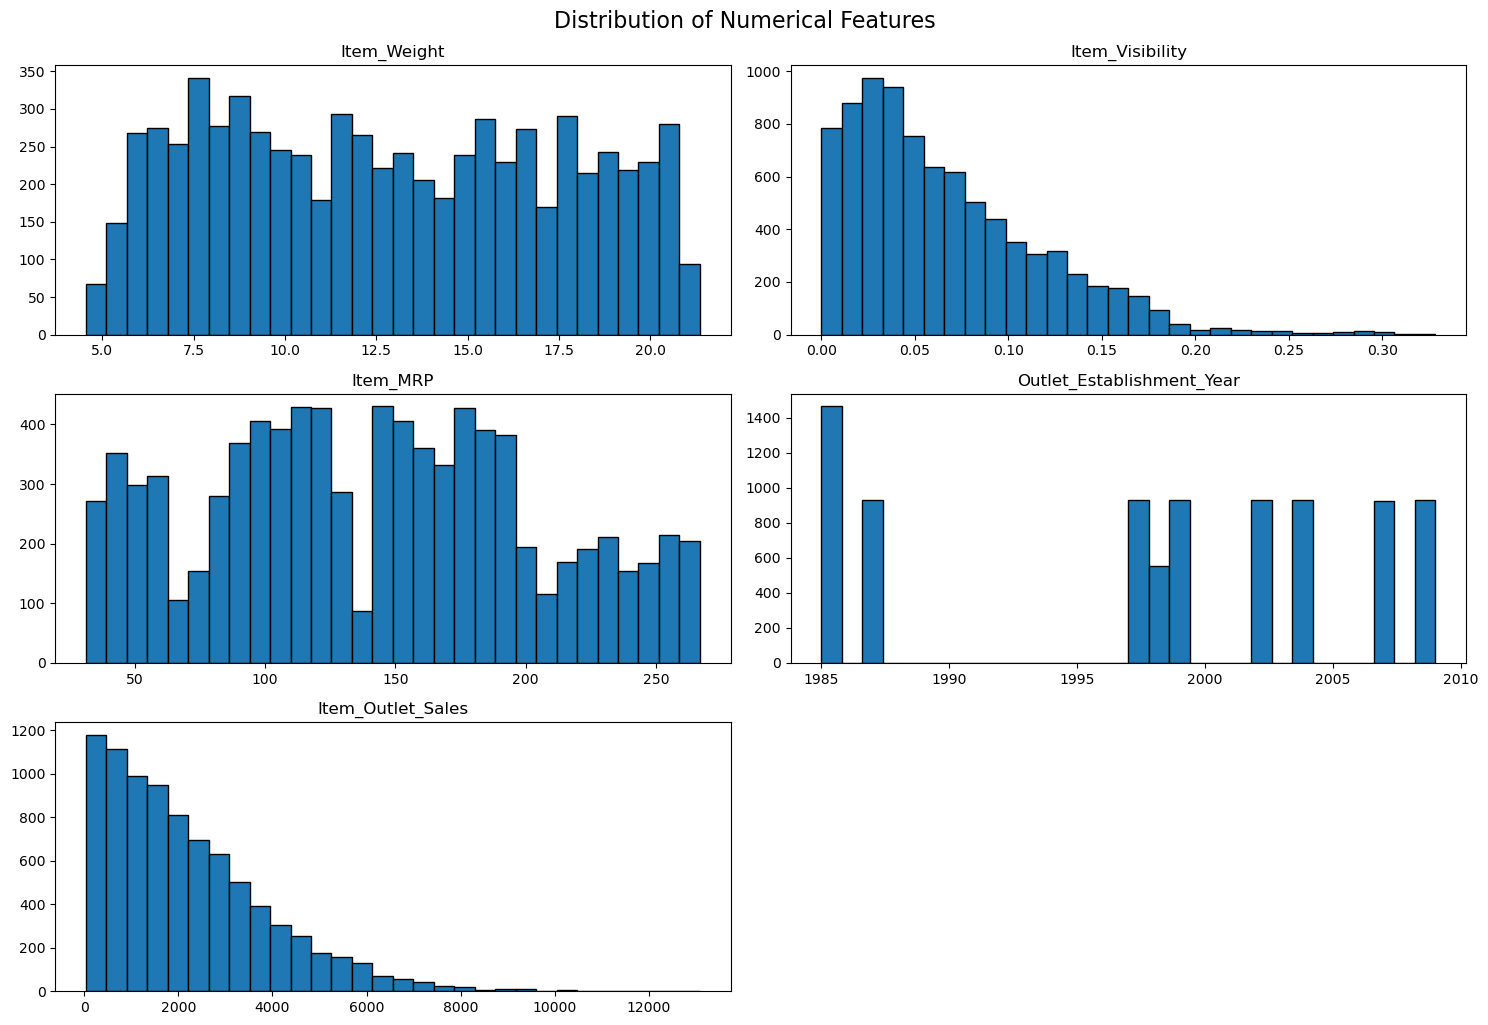

In [25]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black', grid=False)
plt.tight_layout() 
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.show()

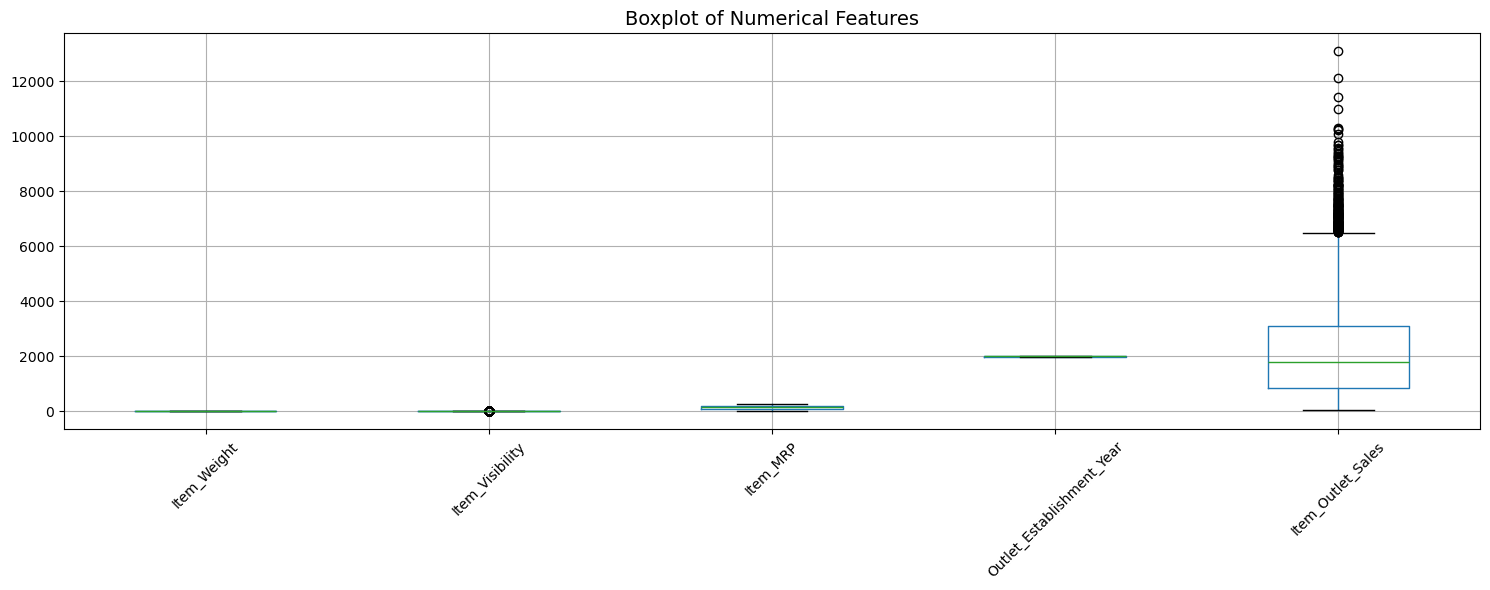

In [28]:
plt.figure(figsize=(15, 6))
df.boxplot()
plt.title('Boxplot of Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

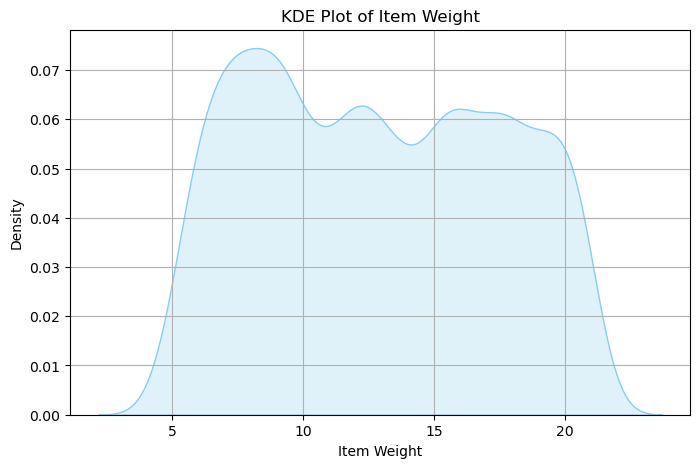

In [31]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Item_Weight'].dropna(), fill=True, color='skyblue')
plt.title('KDE Plot of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [32]:
df.skew(numeric_only=True)

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

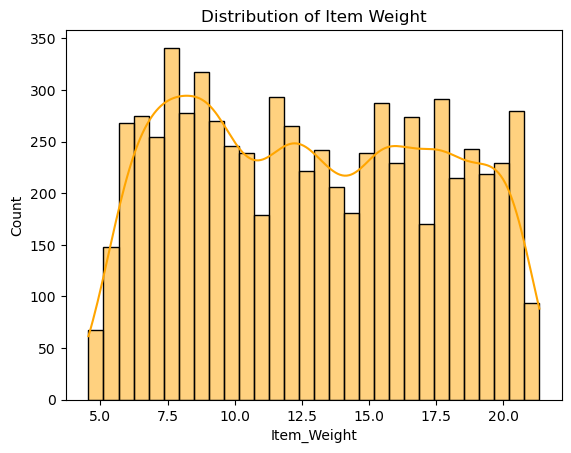

In [33]:
sns.histplot(df['Item_Weight'].dropna(), kde=True, bins=30, color='orange')
plt.title('Distribution of Item Weight')
plt.show()

4. How are categorical variables distributed? Analyze the frequency of each category using bar plots or pie charts. Are there any dominant or rare categories?

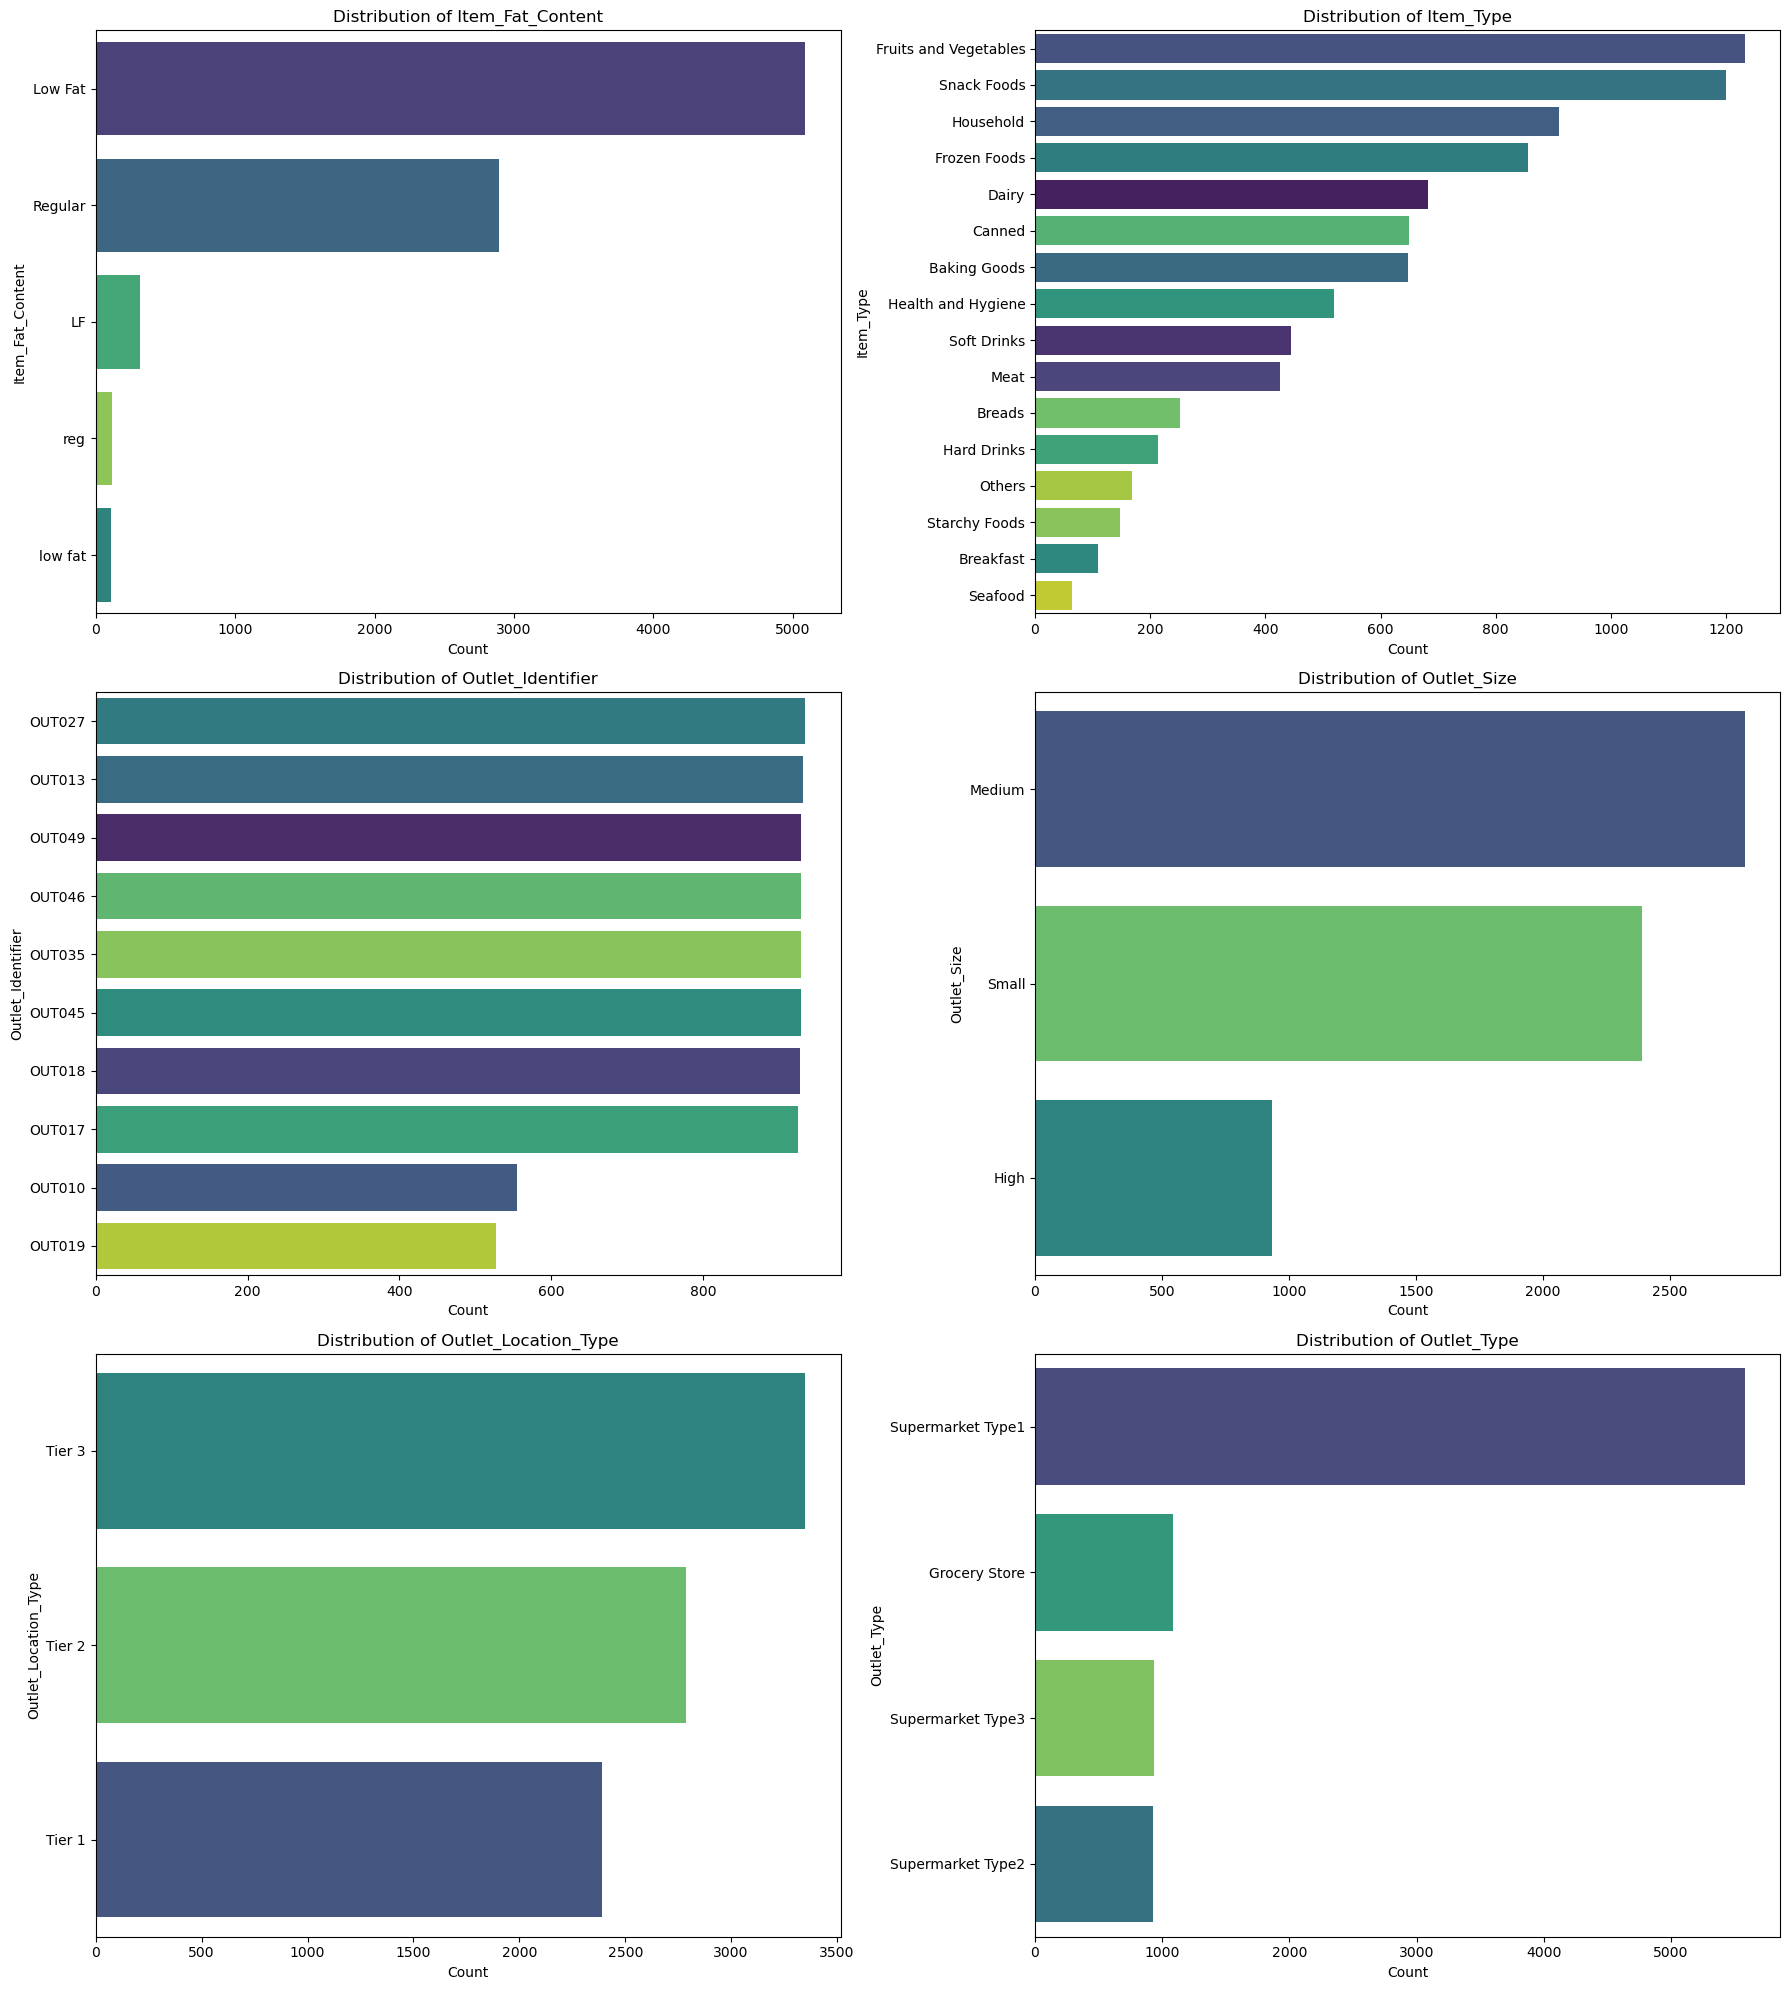

In [35]:
#We analyzed the frequency of categories using bar plots and examined each categorical variable to identify dominant and rare categories.
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plt.figure(figsize=(18, 20))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=col, data=df, hue=col, palette="viridis", legend=False, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

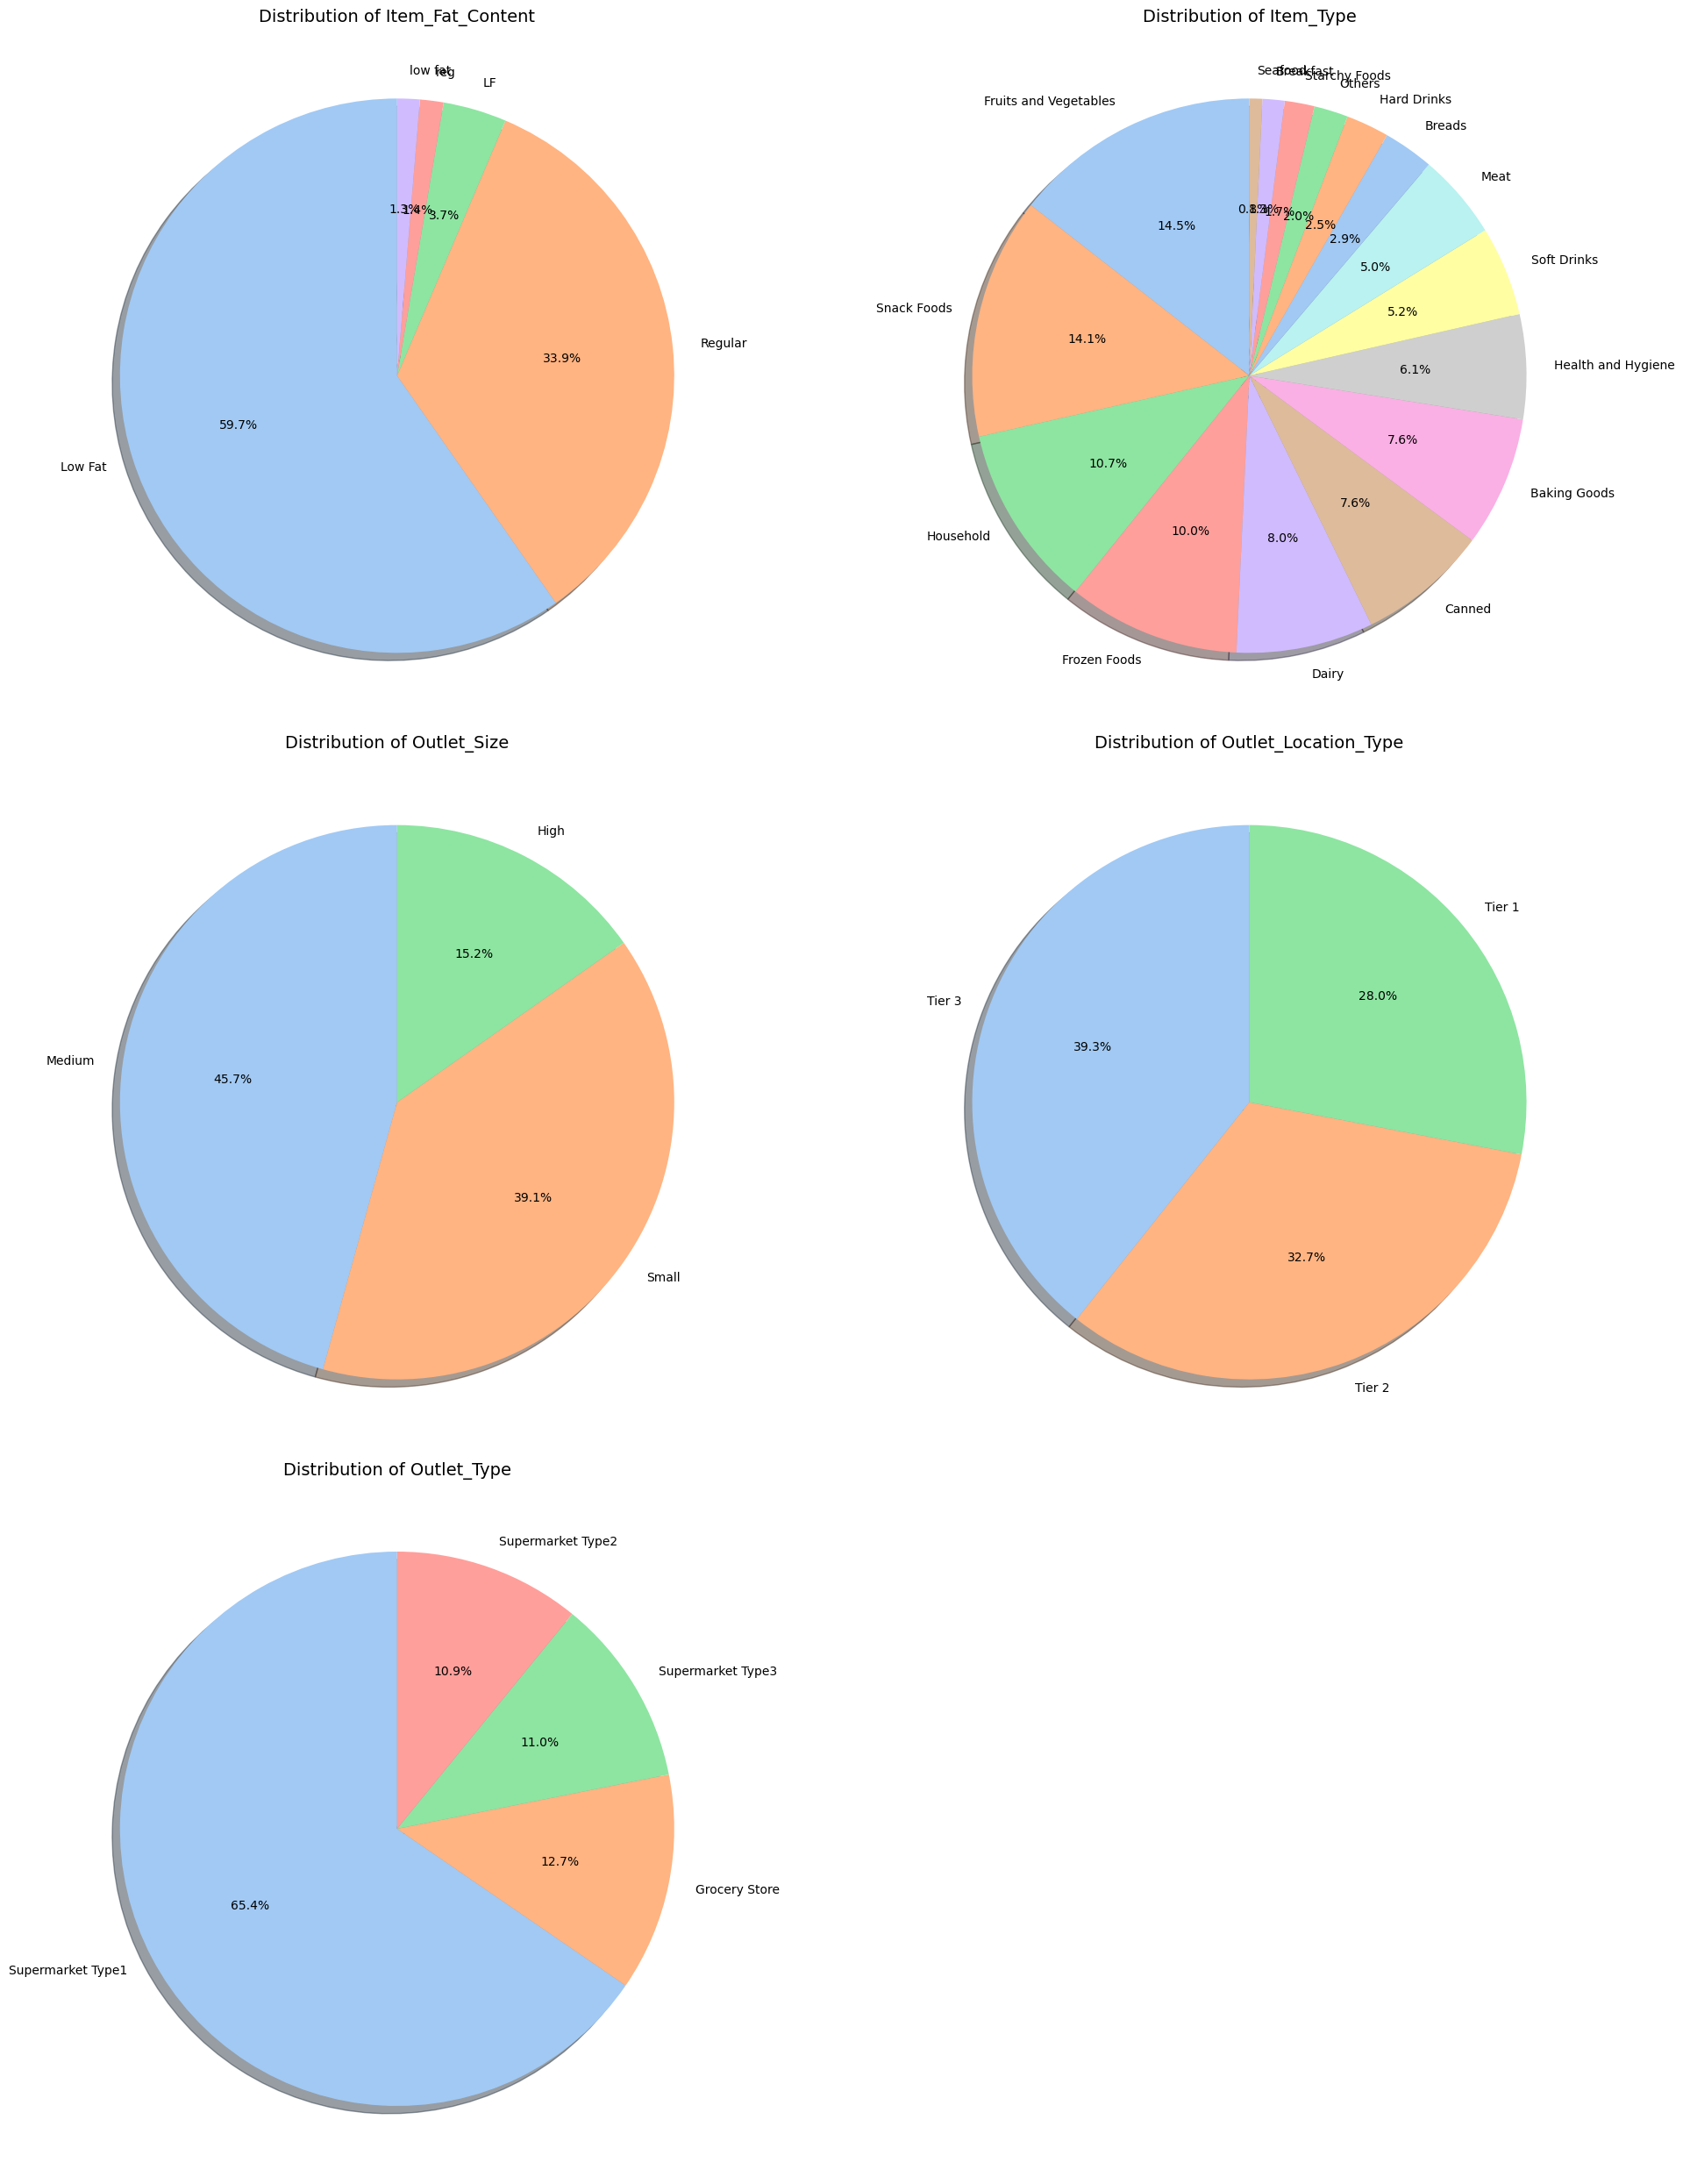

In [36]:
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
                    'Outlet_Location_Type', 'Outlet_Type']
plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=sns.color_palette("pastel"),
        textprops={'fontsize': 10}
    )
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('') 

plt.tight_layout()
plt.show()


In [42]:
dist=df['Outlet_Type'].value_counts(normalize=True) * 100
dist

Outlet_Type
Supermarket Type1    65.434706
Grocery Store        12.706793
Supermarket Type3    10.970316
Supermarket Type2    10.888185
Name: proportion, dtype: float64

In [44]:
dominant_threshold = 50
rare_threshold = 5
dominant = dist[dist > dominant_threshold]
rare = dist[dist < rare_threshold]
print("Dominant Categories:\n", dominant)
print("\nRare Categories:\n", rare)

Dominant Categories:
 Outlet_Type
Supermarket Type1    65.434706
Name: proportion, dtype: float64

Rare Categories:
 Series([], Name: proportion, dtype: float64)


5. Are there any correlations between numerical variables? Generate a correlation matrix and heatmap to identify strong positive or negative relationships.

In [46]:
num_df = df.select_dtypes(include=['int64', 'float64'])

In [48]:
num_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


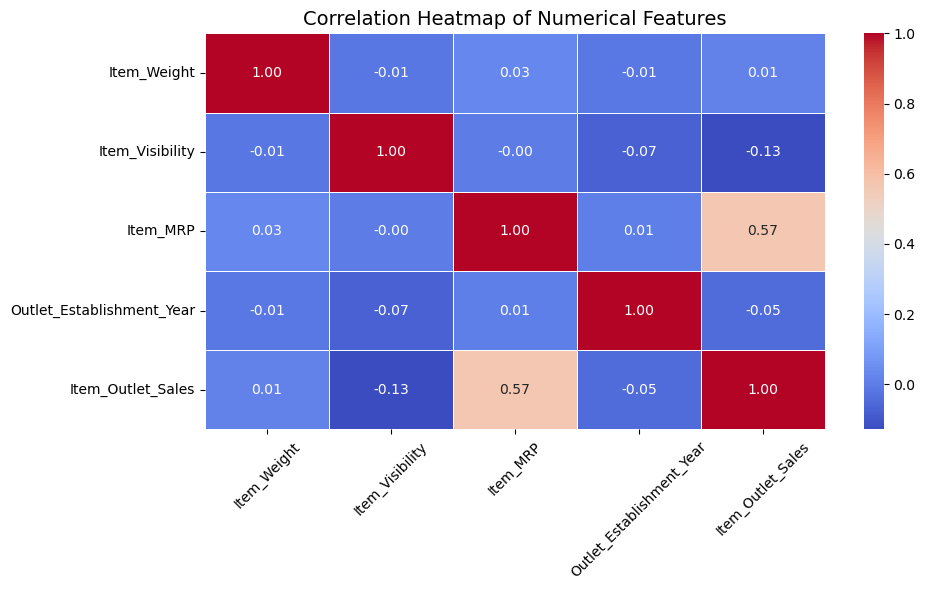

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

6. How do different features relate to the target variable (if any)? Use group-wise aggregations, boxplots, or scatter plots to explore how independent variables influence the target.

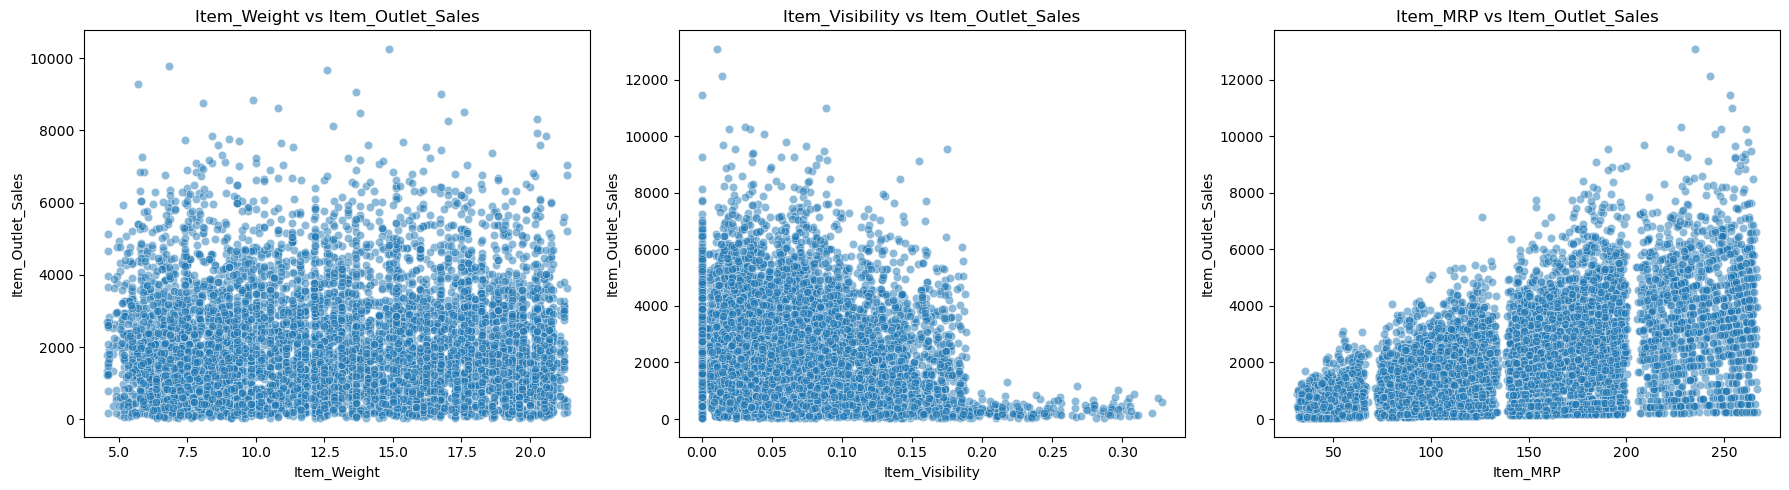

In [52]:
# Numerical features vs Sales - Scatter plots
num_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

plt.figure(figsize=(18, 5))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y='Item_Outlet_Sales', data=df, alpha=0.5)
    plt.title(f'{col} vs Item_Outlet_Sales')

plt.tight_layout()
plt.show()

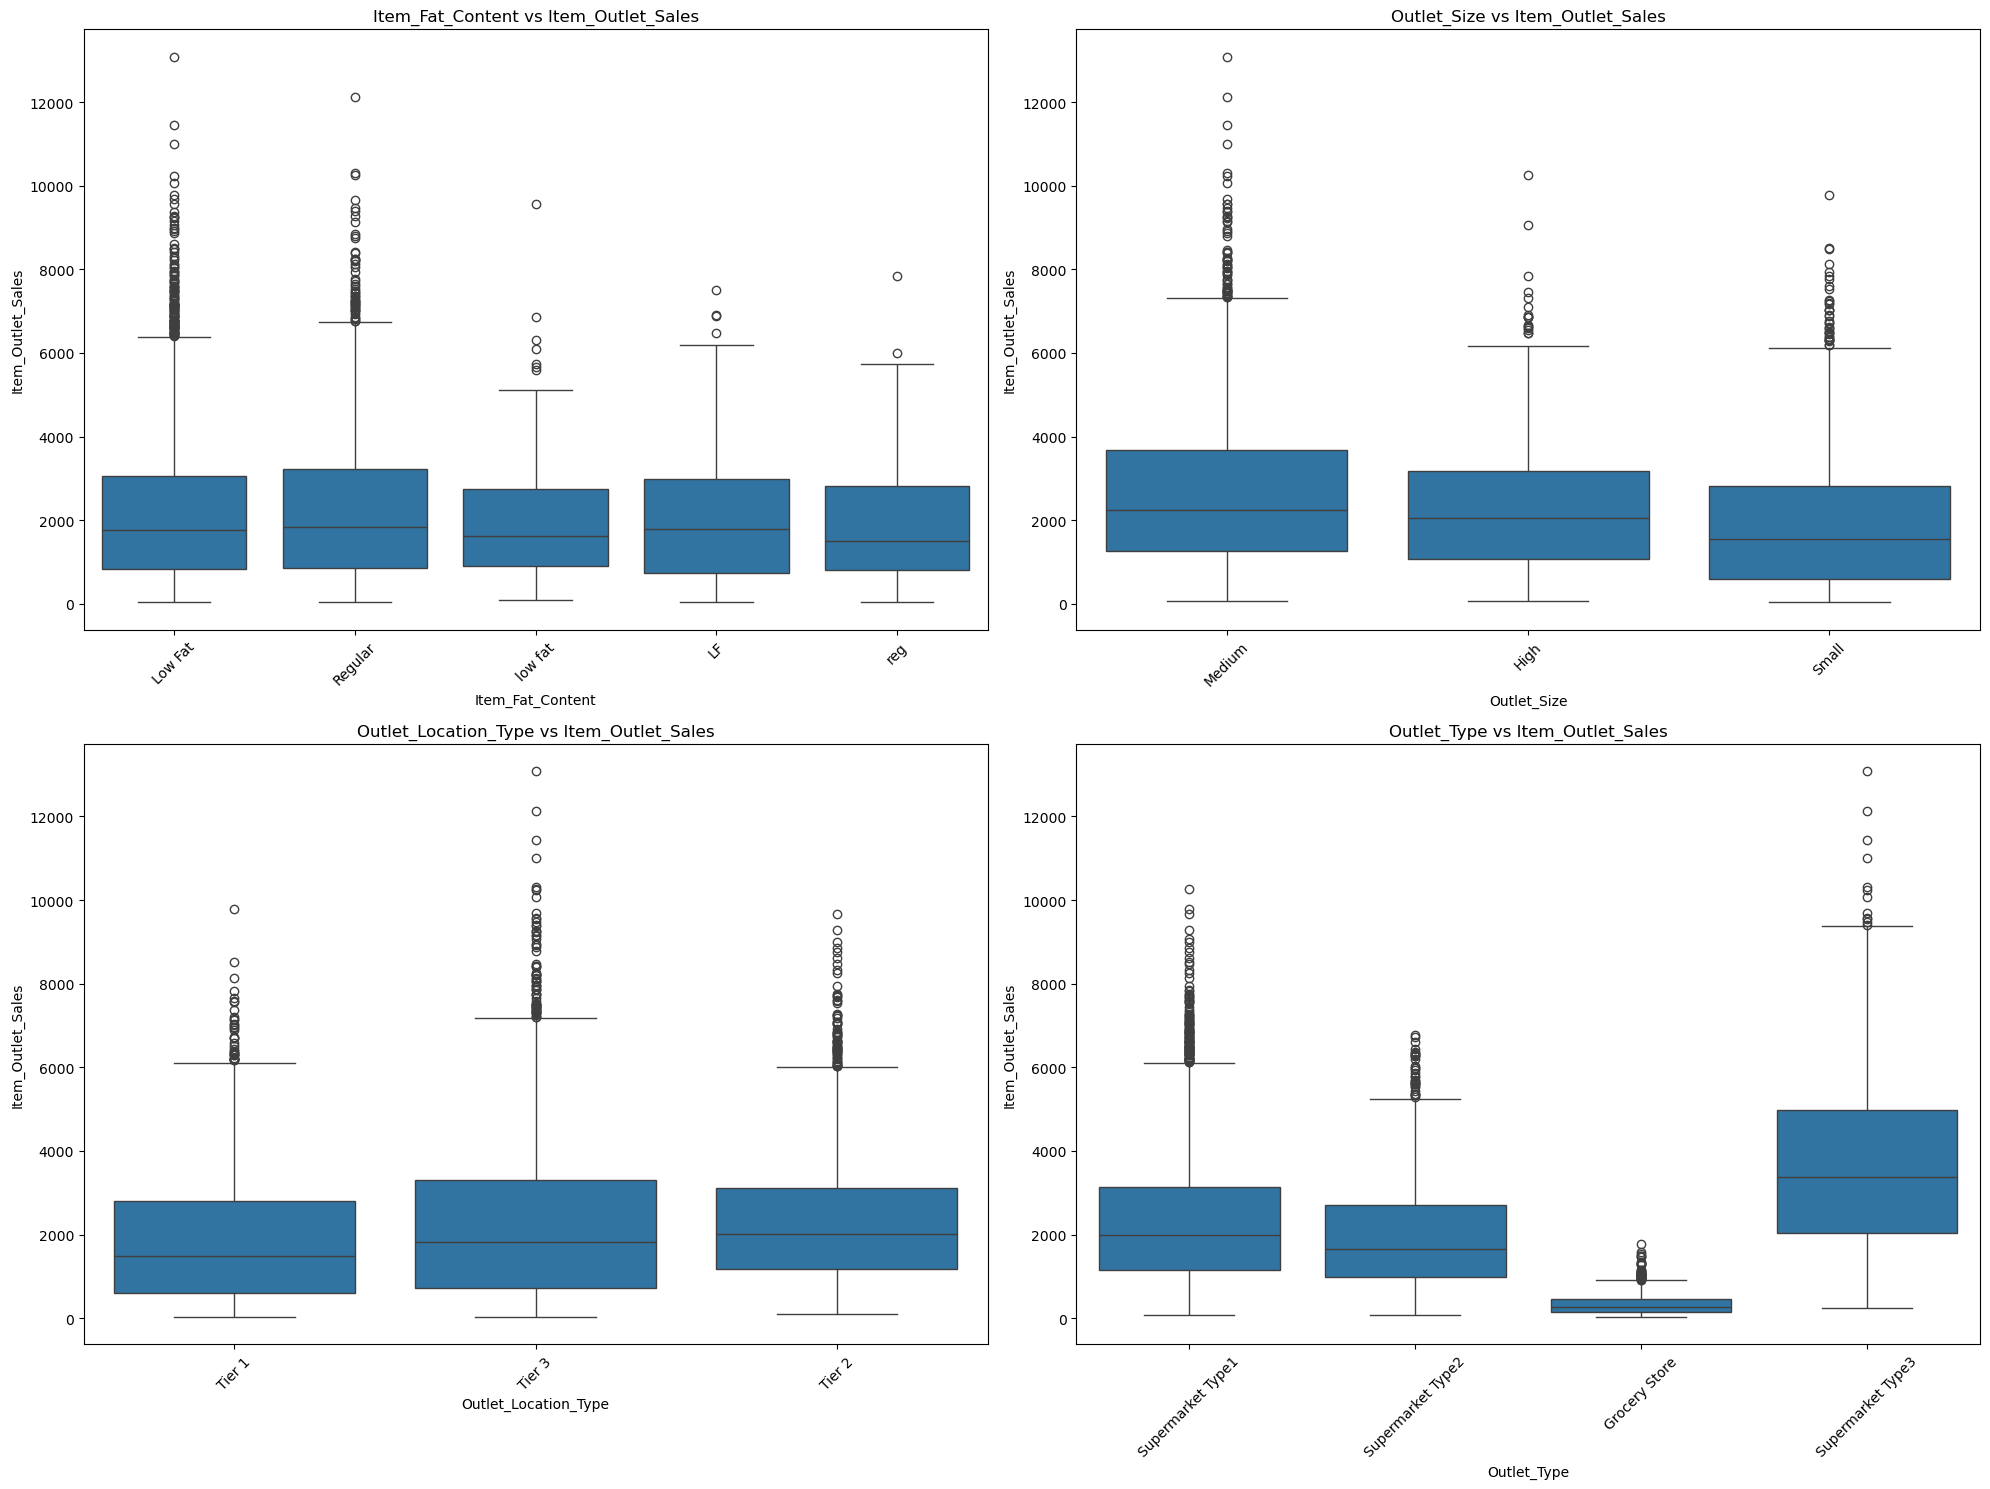

In [53]:
# Categorical features vs Sales - Boxplots
cat_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='Item_Outlet_Sales', data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Item_Outlet_Sales')

plt.tight_layout()
plt.show()


In [55]:
# Group-wise average sales by Item_Type
avg_sales_by_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
print("Average Sales by Item_Type:\n")
print(avg_sales_by_type)

Average Sales by Item_Type:

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64


7. Are there any patterns or trends over time ? If so, create appropriate plots.

In [57]:
# Group by establishment year and calculate total/average sales
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].agg(['sum', 'mean'])
sales_by_year

,sum,mean
Outlet_Establishment_Year,,
1985,3.633620e+06,2483.677474
1987,2.142664e+06,2298.995256
1997,2.118395e+06,2277.844267
1998,1.883402e+05,339.351662
1999,2.183970e+06,2348.354635
2002,2.036725e+06,2192.384798
2004,2.268123e+06,2438.841866
2007,2.167465e+06,2340.675263
2009,1.851823e+06,1995.498739


Text(0.5, 0, 'Establishment Year')

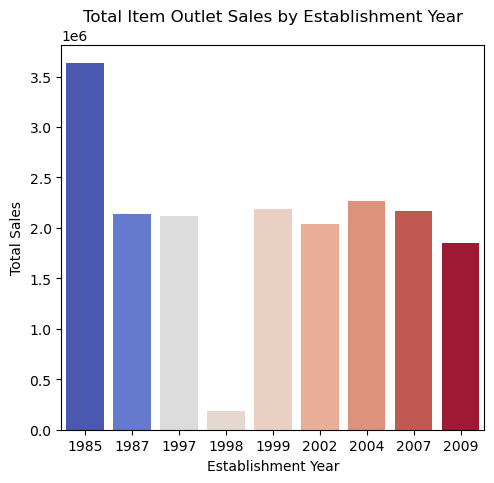

In [63]:
# Plot total and average sales by year
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=sales_by_year, x='Outlet_Establishment_Year', y='sum', hue='Outlet_Establishment_Year', palette='coolwarm', legend=False)
plt.title('Total Item Outlet Sales by Establishment Year')
plt.ylabel('Total Sales')
plt.xlabel('Establishment Year')

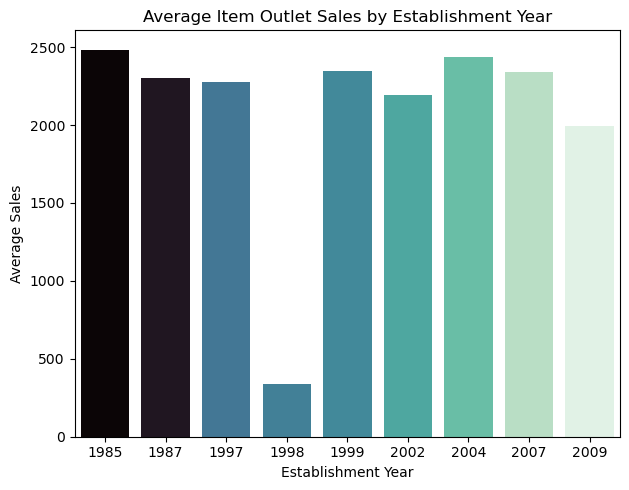

In [64]:
# Average Sales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.barplot(data=sales_by_year, x='Outlet_Establishment_Year', y='mean', hue='Outlet_Establishment_Year', palette='mako', legend=False)
plt.title('Average Item Outlet Sales by Establishment Year')
plt.ylabel('Average Sales')
plt.xlabel('Establishment Year')

plt.tight_layout()
plt.show()

8. Summarize the main findings from your analysis. What are the most important insights you discovered?

The dataset contains 8523 rows and 12 columns.

Mixed data types: numerical and categorical

Descriptive statistics showed high variance in sales, price and item weight.

Missing Values

Numerical Feature Distribution

Categorical Variable Distribution

Correlation Insights

Feature Relationships to Sales

Time-Based Trends    